In [80]:
# Importa as bibliotecas necessárias
import pandas as pd  # Pandas para manipulação de dados tabulares
import numpy as np  # NumPy para operações numéricas
import seaborn as sns  # Seaborn para visualização de dados
from tabulate import tabulate

# Define o caminho da pasta onde o arquivo CSV está localizado
csv_folder = "../csv/"  # Pasta onde o arquivo CSV está armazenado

# Define o nome do arquivo CSV (sem a extensão)
csv_name = "garrafa_agua"  # Nome do arquivo CSV

# Lê o arquivo CSV e armazena os dados em um DataFrame do Pandas
dataframe = pd.read_csv(csv_folder + csv_name + ".csv")  # Carrega o arquivo CSV em um DataFrame


## Mostrando o Dataset

In [81]:
# Exibe a lista de colunas do DataFrame
print(dataframe.columns.to_list())

# Define as colunas que serão usadas para análise
column_x = "tempo"
column_y = "temperatura"

['tempo', 'temperatura']


In [82]:
# Mostra o DataFrame
print(dataframe)

   tempo  temperatura
0      0         70.0
1      1         57.8
2      2         48.9
3      3         42.2
4      4         37.5


## Separando os valores do dataset em lista para colocar no sistema

In [83]:
# Lista dos elementos de X
list_x = dataframe[column_x].to_list()
# Lista dos elementos de Y
list_y = dataframe[column_y].to_list()

## Criação e Resolução do sistema

In [ ]:
# Matriz A do sistema
matrix_a = []

# Matriz B (valores conhecidos de Y, ou seja, os resultados do sistema)
matrix_b = list_y

# Montando a matriz com os valores de X
for i in range(len(dataframe)):
    # Lista para armazenar os coeficientes da equação para a linha atual
    row = []
    # Criando os coeficientes para cada equação do sistema
    # Percorre todas as linhas da tabela(número de pontos no dataframe)
    for j in range(len(dataframe)):
        # Adiciona na linha o valor de X elevado à potência j
        row.append(list_x[i] ** j)
    
    # Converte a lista em um array NumPy
    row = np.array(row)
    
    # Adiciona a linha recém-criada à matriz A
    matrix_a.append(row)

# Convertendo a matriz A para uma matriz NumPy (necessária para operações matriciais)
matrix_a = np.asmatrix(matrix_a)

# Exibindo as matrizes
print(f"Matriz A:\n{tabulate(matrix_a.tolist())}")
print(f"Matriz B:\n{tabulate([matrix_b])}")

# Solução do sistema de equações
# Multiplicamos a inversa de A por B para encontrar os coeficientes da solução
system_solution = np.linalg.inv(matrix_a).dot(matrix_b)

# Exibe a matriz solução
print(f"\nMatriz de Solução do sistema:\n{tabulate(system_solution.tolist())}")

Matriz A:
-  -  --  --  ---
1  0   0   0    0
1  1   1   1    1
1  2   4   8   16
1  3   9  27   81
1  4  16  64  256
-  -  --  --  ---
Matriz B:
--  ----  ----  ----  ----
70  57.8  48.9  42.2  37.5
--  ----  ----  ----  ----

Matriz de Solução do sistema:
--  --------  ------  ---------  ------
70  -14.4417  2.6125  -0.408333  0.0375
--  --------  ------  ---------  ------


# Descobrir um valor de Y tendo um valor de X

In [85]:
# Número escolhido para previsão específica
target_x = 3.5

# Converte a solução do sistema para uma lista
system_solution_list = system_solution.tolist()[0]

# Lista para armazenar os valores previstos de Y
predicted_y_list = []

# Intervalo entre um ponto e outro
step = 0.5

# Definição do intervalo de X baseado nos valores mínimos e máximos da lista
lowest_number_of_list = min(list_x)
highest_number_of_list = max(list_x) + 1

# Gera os pontos de X onde Y será calculado
generated_x_points = np.arange(lowest_number_of_list, highest_number_of_list, step)

# Calcula os valores previstos de Y
for x in generated_x_points:
    y = 0
    for a in range(len(system_solution_list)):
        # Faz o "Somatório" dos valores de Y
        y += system_solution_list[a] * (x ** a)
    # Adiciona o valor de Y na lista de valores "previstos"
    predicted_y_list.append(y)

predicted_y = sum(system_solution_list[a] * (target_x ** a) for a in range(len(system_solution_list)))
# Printa o valor de Y para o valor desejado de X que havia sido escolhido
print(f"O valor de Y para {target_x} é = {predicted_y}")

# Exibe a quantidade de pontos calculados
print(f"Valor de pontos calculados: {len(predicted_y_list)}")


O valor de Y para 3.5 é = 39.57734374999942
Valor de pontos calculados: 10


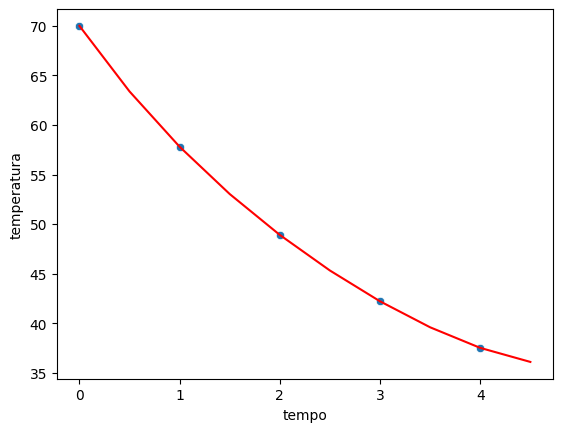

In [86]:
# criando um grafico de pontos para os dados já conhecidos 
plot = sns.scatterplot(dataframe, x=dataframe.columns[0], y=dataframe.columns[1])
# criando um grafico de linha para os pontos que foram calculados
plot = sns.lineplot(x=generated_x_points, y=predicted_y_list, color="red")